In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import json
import numpy as np
import random

category_dict = {"안전/환경": 1,"미래": 2,"일자리": 3,"보건복지": 4,"정치개혁": 5,"경제민주화": 6,"인권/성평등": 7,"외교/통일/국방": 8,"육아/교육": 9,"문화/예술/체육/언론": 10,"반려동물": 11,"교통/건축/국토": 12,"행정": 13,"농산어촌": 14,"저출산/고령화대책": 15,"성장동력": 16,"기타": 17}


In [79]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# 토큰화 된 corpus 데이터를 불러온다.
with open('corpus2.json','r') as f:
    json_corpus = json.load(f)
    

a_list = list()
b_list = list()
c_list = list()

add_list = list()
y_train = list()
# target = '미래'
for categ,value in json_corpus.items():
#     if categ == '기타':
#         break
        
    add_list.extend(value)
    y_train.extend([category_dict[categ]]*len(value))



In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

X,Y =shuffle(add_list, y_train)
x_test = X[-3200:]
y_test = Y[-3200:]
x_val = X[5000:7000]
y_val = Y[5000:7000]
X = X[:5000]
Y = Y[:5000]

vectorizer = TfidfVectorizer()
# x_train = vectorizer.fit_transform(add_list)

vec = vectorizer.fit(X)

train_x = vec.transform(X).toarray()
# train_x = train_x[:,:,None]
train_y = np.array(Y)
train_y = to_categorical(train_y,num_classes=18)

val_x = vec.transform(x_val).toarray()
# train_x = train_x[:,:,None]
val_y = np.array(y_val)
val_y = to_categorical(val_y,num_classes=18)

# train_y = train_y[:,None]
test_x = vec.transform(x_test).toarray()
# test_x = test_x[:,:,None]
test_y = np.array(y_test)
test_y = to_categorical(test_y,num_classes=18)
# test_y = test_y[:,None]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(val_x.shape)
print(val_y.shape)

(5000, 19236)
(5000, 18)
(3200, 19236)
(3200, 18)
(2000, 19236)
(2000, 18)


Train on 5000 samples, validate on 2000 samples
Epoch 1/30
5000/5000 [==============================] - 3s 592us/step - loss: 2.8630 - acc: 0.1916 - val_loss: 2.8329 - val_acc: 0.2210
Epoch 2/30
5000/5000 [==============================] - 2s 319us/step - loss: 2.7736 - acc: 0.3156 - val_loss: 2.7864 - val_acc: 0.2170
Epoch 3/30
5000/5000 [==============================] - 2s 310us/step - loss: 2.6955 - acc: 0.3518 - val_loss: 2.7478 - val_acc: 0.2245
Epoch 4/30
5000/5000 [==============================] - 1s 298us/step - loss: 2.6238 - acc: 0.3748 - val_loss: 2.7147 - val_acc: 0.2295
Epoch 5/30
5000/5000 [==============================] - 1s 270us/step - loss: 2.5570 - acc: 0.3990 - val_loss: 2.6860 - val_acc: 0.2350
Epoch 6/30
5000/5000 [==============================] - 2s 344us/step - loss: 2.4942 - acc: 0.4164 - val_loss: 2.6600 - val_acc: 0.2420
Epoch 7/30
5000/5000 [==============================] - 1s 282us/step - loss: 2.4350 - acc: 0.4368 - val_loss: 2.6370 - val_acc: 0.2520


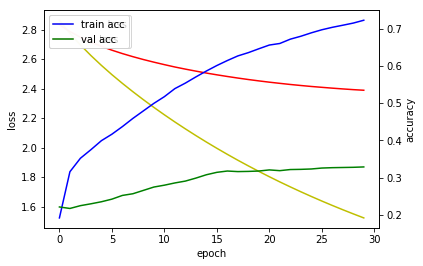

3200/3200 [==============================] - 1s 168us/step
loss_and_metrics : [2.395109964609146, 0.33187499999999998]


In [122]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(18, input_dim=train_x.shape[1], activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(train_x, train_y,validation_data=(val_x,val_y), epochs=30, batch_size=64)
model.summary()
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(test_x, test_y, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))




In [121]:
from keras.layers import Dropout
# 2. 다중 퍼셉트론

model = Sequential()
model.add(Dense(64, input_dim=train_x.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(18, activation='softmax'))
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(train_x, train_y,validation_data=(val_x,val_y), epochs=15, batch_size=64)
model.summary()
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(test_x, test_y, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

Train on 5000 samples, validate on 2000 samples
Epoch 1/15
5000/5000 [==============================] - 5s 1ms/step - loss: 2.8265 - acc: 0.1492 - val_loss: 2.7554 - val_acc: 0.1430
Epoch 2/15
5000/5000 [==============================] - 3s 659us/step - loss: 2.6739 - acc: 0.1502 - val_loss: 2.6585 - val_acc: 0.1485
Epoch 3/15
3008/5000 [=================>............] - ETA: 1s - loss: 2.5648 - acc: 0.1895

KeyboardInterrupt: 

Train on 5000 samples, validate on 2000 samples
Epoch 1/30
5000/5000 [==============================] - 5s 1ms/step - loss: 2.8218 - acc: 0.1278 - val_loss: 2.7267 - val_acc: 0.1365
Epoch 2/30
5000/5000 [==============================] - 3s 667us/step - loss: 2.5919 - acc: 0.1832 - val_loss: 2.5533 - val_acc: 0.2605
Epoch 3/30
5000/5000 [==============================] - 3s 651us/step - loss: 2.1912 - acc: 0.4202 - val_loss: 2.3873 - val_acc: 0.3220
Epoch 4/30
5000/5000 [==============================] - 4s 710us/step - loss: 1.7475 - acc: 0.5396 - val_loss: 2.3627 - val_acc: 0.3260
Epoch 5/30
5000/5000 [==============================] - 4s 715us/step - loss: 1.3812 - acc: 0.6346 - val_loss: 2.4306 - val_acc: 0.3160
Epoch 6/30
5000/5000 [==============================] - 3s 663us/step - loss: 1.1040 - acc: 0.7196 - val_loss: 2.5343 - val_acc: 0.3120
Epoch 7/30
5000/5000 [==============================] - 3s 678us/step - loss: 0.9097 - acc: 0.7706 - val_loss: 2.6622 - val_acc: 0.3025
Ep

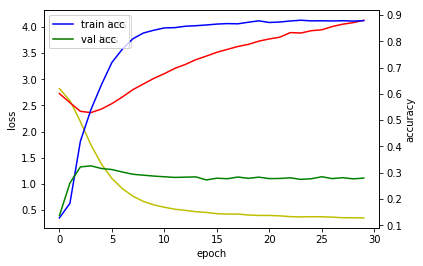

3200/3200 [==============================] - 1s 215us/step
loss_and_metrics : [4.0930184602737425, 0.28062500000000001]


In [119]:
# 2. 깊은 다중 퍼셉트론
model = Sequential()
model.add(Dense(64, input_dim=train_x.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(18, activation='softmax'))
# 3. 모델 학습과정 설정하기
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(train_x, train_y,validation_data=(val_x,val_y), epochs=30, batch_size=64)
model.summary()
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(test_x, test_y, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

In [123]:
# model.evaluate(test_x, test_y, batch_size=32)
sub = list()
for i,j in enumerate(test_x):
#     print(j.shape)
    j = np.array([j])
#     np.reshape(j, (19236,)
    score = model.predict_classes(j)
    
    if score == np.array(test_y[i].argmax()):
        sub.append([int(test_y[i].argmax()),1])
    else:
        sub.append([int(test_y[i].argmax()),0])

name = './SinglePerceptronClassifier.json'
with open(name,'w') as f:
    json.dump(sub,f)

[[7, 0],
 [7, 1],
 [8, 0],
 [17, 0],
 [5, 1],
 [5, 0],
 [12, 0],
 [13, 0],
 [1, 1],
 [7, 0],
 [12, 0],
 [15, 0],
 [6, 0],
 [7, 0],
 [10, 0],
 [5, 1],
 [1, 0],
 [10, 0],
 [10, 0],
 [3, 0],
 [8, 0],
 [1, 1],
 [13, 0],
 [4, 1],
 [4, 0],
 [2, 0],
 [9, 0],
 [2, 0],
 [3, 1],
 [5, 0],
 [1, 1],
 [9, 0],
 [3, 0],
 [8, 0],
 [8, 0],
 [5, 0],
 [4, 0],
 [14, 0],
 [2, 0],
 [12, 1],
 [13, 1],
 [5, 1],
 [1, 1],
 [8, 1],
 [5, 1],
 [9, 0],
 [15, 0],
 [5, 1],
 [1, 1],
 [9, 1],
 [13, 0],
 [10, 0],
 [3, 1],
 [5, 0],
 [5, 0],
 [10, 0],
 [10, 1],
 [4, 1],
 [8, 1],
 [8, 1],
 [10, 1],
 [7, 0],
 [12, 0],
 [10, 0],
 [10, 0],
 [10, 1],
 [3, 1],
 [13, 0],
 [5, 0],
 [5, 0],
 [5, 0],
 [5, 0],
 [13, 0],
 [5, 1],
 [14, 0],
 [1, 0],
 [10, 1],
 [7, 0],
 [8, 1],
 [16, 0],
 [15, 0],
 [3, 0],
 [9, 0],
 [8, 1],
 [5, 1],
 [4, 1],
 [5, 0],
 [13, 0],
 [8, 0],
 [8, 1],
 [3, 0],
 [5, 1],
 [5, 1],
 [1, 1],
 [4, 1],
 [5, 1],
 [12, 0],
 [2, 0],
 [1, 0],
 [9, 1],
 [9, 1],
 [6, 0],
 [13, 0],
 [3, 0],
 [5, 1],
 [5, 1],
 [12, 0],
 [8, 

In [95]:
k = sum(k, [])

In [98]:
len(k[1])

IndexError: index 1 is out of bounds for axis 0 with size 0